In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [68]:
df = pd.read_csv("madfhantr.csv");

In [69]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
#Checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
#As loan ID is not a predictive value so we can remove it....
if "Loan_ID" in df.columns:
    df = df.drop('Loan_ID',axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
#df.dropna(inplace=True)

In [74]:
# Categorical values
categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History'];

for col in categorical_cols:
    if col in df.columns:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
#Numerical columns
numerical_columns = ['LoanAmount','Loan_Amount_Term'];

for col in numerical_columns:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
# Preprocessing: Encoding values
df['Dependents'] = df['Dependents'].replace('3+','3')
df['Dependents'] = pd.to_numeric(df['Dependents'])

df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Married'] = df['Married'].map({'Yes':1,'No':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})

#Encoding target variable
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

#Applying OHE on Property_Area
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,False,True
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,False
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,False,True
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,False,True
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,False,False
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,False,False
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,False,True
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,False,True


In [77]:
#Splitting dataset
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [78]:
#storing feature names for the tree plot
feature_names = list(X.columns)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
print(X_train.shape,X_test.shape)

(491, 12) (123, 12)


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [82]:
t = tree.DecisionTreeClassifier(max_depth=3)
t.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [83]:
from sklearn.metrics import accuracy_score
predictions = t.predict(X_test)
print(accuracy_score(y_test,predictions))

0.7886178861788617


In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
print(classification_report(y_test,predictions,target_names=['Not Eligible (N)','Eligible (Y)']))

                  precision    recall  f1-score   support

Not Eligible (N)       0.95      0.42      0.58        43
    Eligible (Y)       0.76      0.99      0.86        80

        accuracy                           0.79       123
       macro avg       0.85      0.70      0.72       123
    weighted avg       0.83      0.79      0.76       123



In [86]:
print(confusion_matrix(y_test,predictions))

[[18 25]
 [ 1 79]]


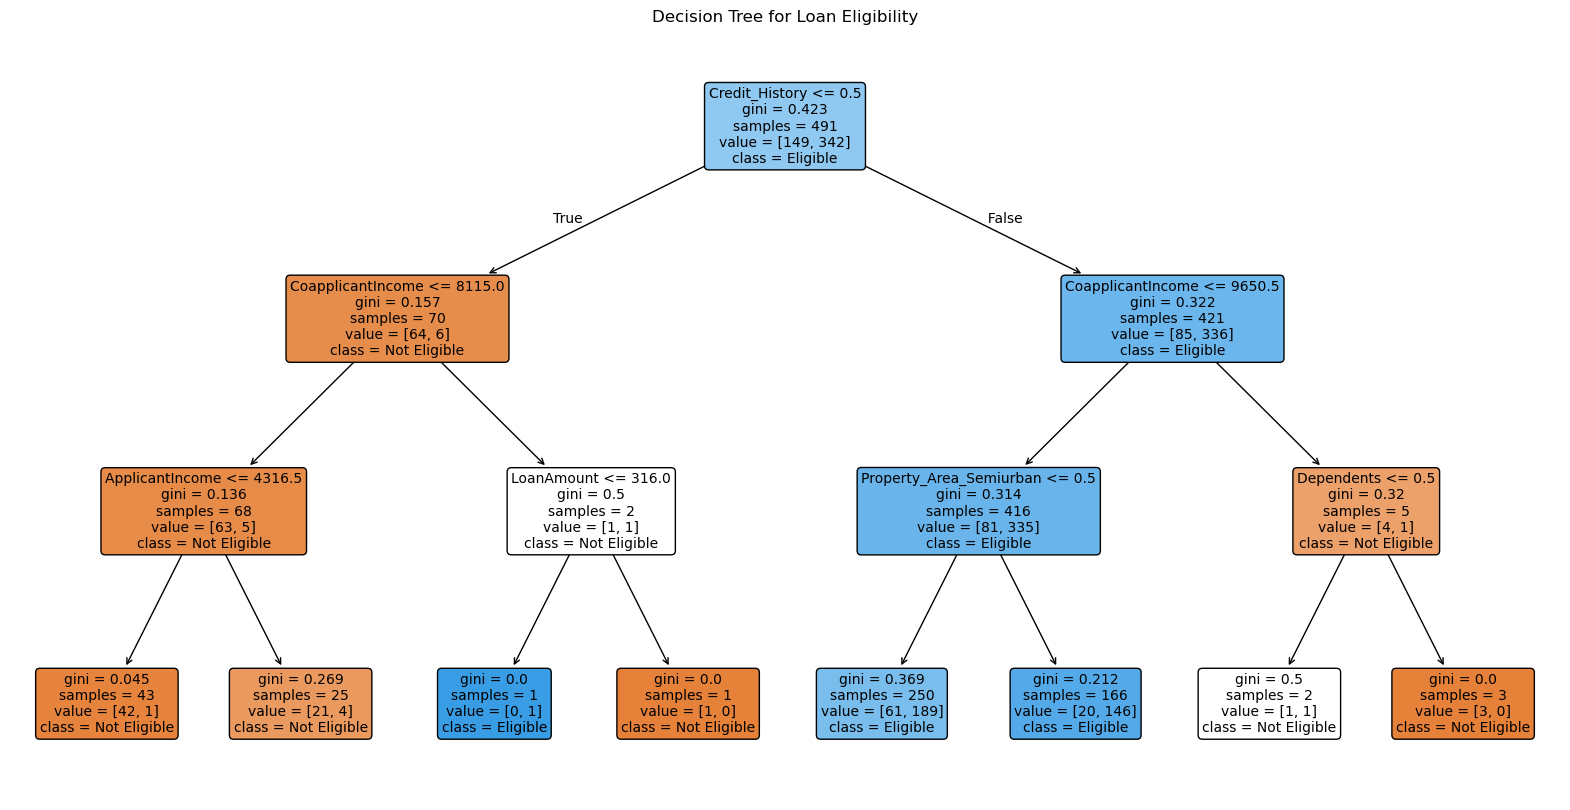

In [87]:
#Plot of Tree
plt.figure(figsize=(20,10))
plot_tree(t,filled=True,rounded=True,class_names=['Not Eligible','Eligible'],feature_names=feature_names,max_depth=3,fontsize=10)
plt.title("Decision Tree for Loan Eligibility")
plt.savefig('decision_tree_1.png')

In [89]:
#User Input:
import pandas as pd

# This assumes 'clf' (your trained model) and 'feature_names' 
# (the list of column names) already exist in memory from previous cells.

try:
    # --- 1. Get User Input ---
    print("--- Enter Customer Details for Loan Eligibility ---")
    
    # Get categorical inputs
    gender_in = input("Gender (Male/Female): ").strip().title()
    married_in = input("Married (Yes/No): ").strip().title()
    dependents_in = input("Dependents (0, 1, 2, or 3+): ").strip().replace('+', '')
    education_in = input("Education (Graduate/Not Graduate): ").strip().title()
    self_employed_in = input("Self Employed (Yes/No): ").strip().title()
    credit_history_in = input("Credit History Met (1) or Not Met (0): ").strip()
    property_area_in = input("Property Area (Rural/Semiurban/Urban): ").strip().title()

    # Get numerical inputs
    applicant_income_in = float(input("Applicant Income (e.g., 5849): "))
    coapplicant_income_in = float(input("Coapplicant Income (e.g., 1508.0): "))
    loan_amount_in = float(input("Loan Amount in thousands (e.g., 128): "))
    loan_term_in = float(input("Loan Amount Term in months (e.g., 360): "))

    # --- 2. Process the Input ---
    
    # Create a dictionary to hold the processed data
    input_data = {}

    # Map binary/ordinal inputs
    input_data['Gender'] = 1 if gender_in == 'Male' else 0
    input_data['Married'] = 1 if married_in == 'Yes' else 0
    input_data['Education'] = 1 if education_in == 'Graduate' else 0
    input_data['Self_Employed'] = 1 if self_employed_in == 'Yes' else 0
    
    # Map numerical inputs
    input_data['Dependents'] = int(dependents_in)
    input_data['Credit_History'] = float(credit_history_in)
    input_data['ApplicantIncome'] = applicant_income_in
    input_data['CoapplicantIncome'] = coapplicant_income_in
    input_data['LoanAmount'] = loan_amount_in
    input_data['Loan_Amount_Term'] = loan_term_in
    
    # Handle the one-hot encoded 'Property_Area'
    input_data['Property_Area_Semiurban'] = 1 if property_area_in == 'Semiurban' else 0
    input_data['Property_Area_Urban'] = 1 if property_area_in == 'Urban' else 0
    # Note: If 'Rural', both will be 0, which is correct (due to drop_first=True)

    # --- 3. Create DataFrame for Prediction ---
    
    # Convert the dictionary to a single-row DataFrame
    # We pass [input_data] to make it a list containing one dictionary
    input_df = pd.DataFrame([input_data])
    
    # Ensure the columns are in the *exact* same order as the training data
    # 'feature_names' should be from Cell 11
    input_df = input_df[feature_names] 

    # --- 4. Make Prediction ---
    
    # Get the prediction (will be [0] or [1])
    prediction = t.predict(input_df)
    
    # Get the probability (confidence) of the prediction
    prediction_proba = t.predict_proba(input_df)

    # --- 5. Show the Result ---
    
    print("\n--- Processing Complete ---")
    
    if prediction[0] == 1:
        eligibility = "Eligible"
        confidence = prediction_proba[0][1] # Probability of class 1
    else:
        eligibility = "Not Eligible"
        confidence = prediction_proba[0][0] # Probability of class 0

    print(f"\nPrediction: Loan Status is {eligibility}")
    print(f"Confidence: {confidence*100:.2f}%")

except ValueError:
    print("\nError: Invalid input. Please make sure you enter numbers for numerical fields.")
except NameError:
    print("\nError: Model 'clf' or 'feature_names' not found.")
    print("Please make sure you have run the training cells (1-13) first.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

--- Enter Customer Details for Loan Eligibility ---


Gender (Male/Female):  Male
Married (Yes/No):  No
Dependents (0, 1, 2, or 3+):  2
Education (Graduate/Not Graduate):  Not Graduate
Self Employed (Yes/No):  Ni
Credit History Met (1) or Not Met (0):  0
Property Area (Rural/Semiurban/Urban):  Urban
Applicant Income (e.g., 5849):  5849
Coapplicant Income (e.g., 1508.0):  1508.0
Loan Amount in thousands (e.g., 128):  128
Loan Amount Term in months (e.g., 360):  360



--- Processing Complete ---

Prediction: Loan Status is Not Eligible
Confidence: 84.00%
